<a href="https://colab.research.google.com/github/SteffanBurnette/ML-Stuff/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tarfile
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#A function that fetchs the housing dataset from the proviuded directory
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 os.makedirs(housing_path, exist_ok=True)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#A function that loads the data from the directory given
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)
#Return a pandas dataframe object containing all of the values


🔑- The functions aboved seemed to be outdated so i just went with the standard **.read_csv**.

In [ ]:
housing = pd.read_csv("/content/sample_data/california_housing_train.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
#If one of the categories was of type object you could get that objects values with:
#  housing["obj_category"].value_counts()

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualizing The dataset

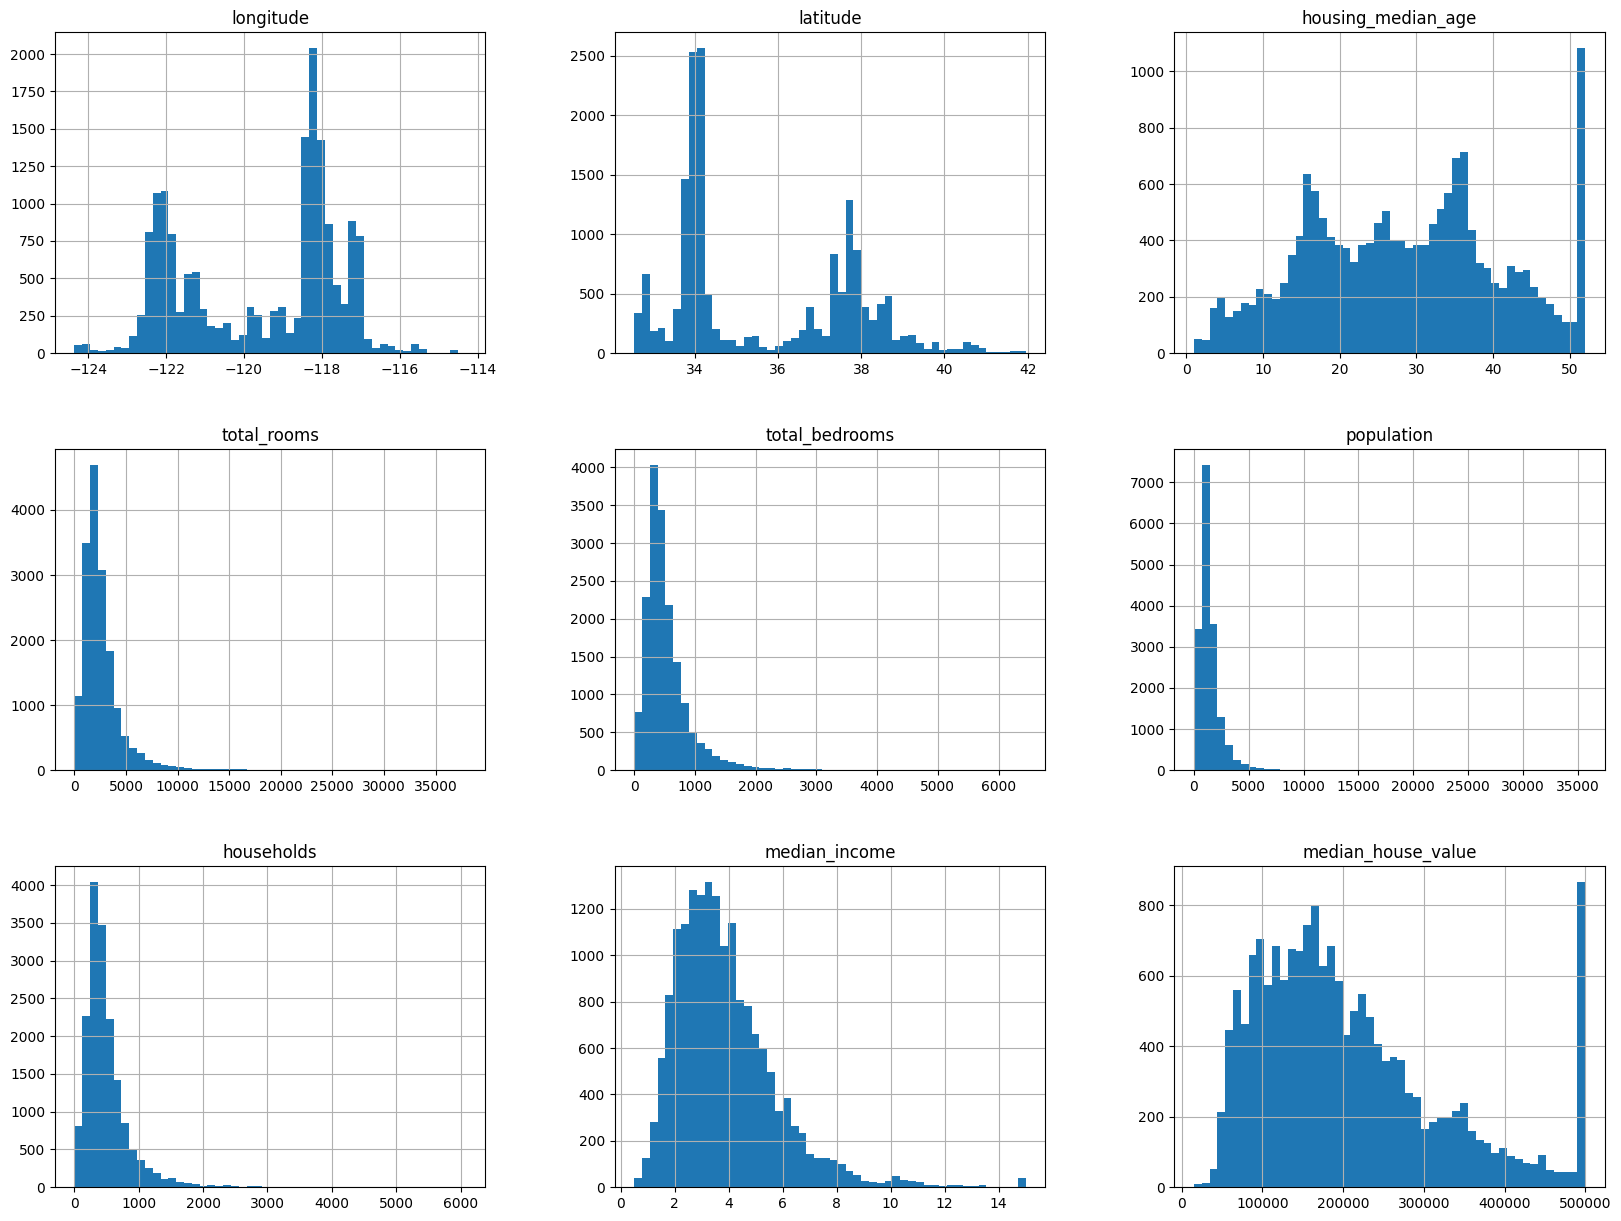

In [ ]:
#Plotting a histogram for every category in the dataset
housing.hist(bins=50, figsize=(20,15))
plt.show()


## The Test Set

In [ ]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [ ]:
test_set = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
len(test_set)

3000

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

<Axes: >

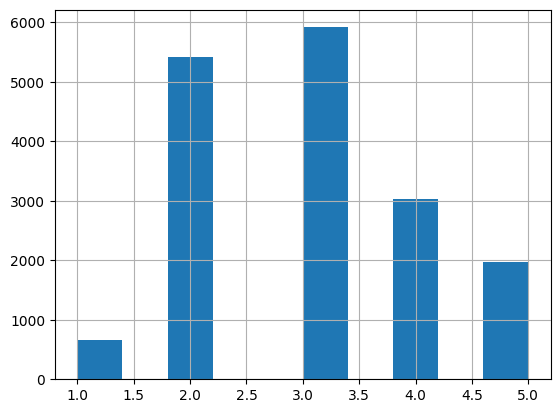

In [ ]:
housing["income_cat"].hist()

## Stratified Sampling

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]


In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


,count
income_cat,
3,0.348235
2,0.318235
4,0.178235
5,0.116176
1,0.039118


In [ ]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()


## Visualizing The data

<Axes: xlabel='longitude', ylabel='latitude'>

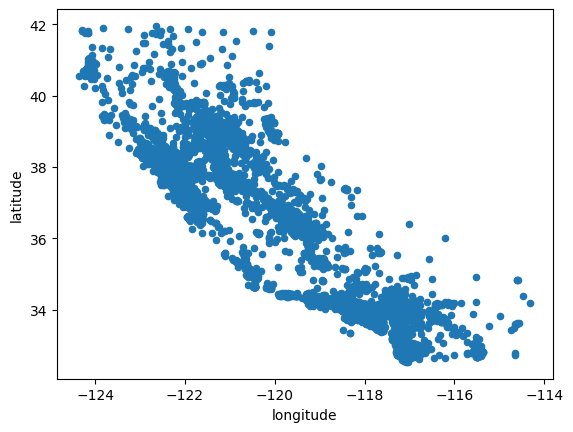

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points

<Axes: xlabel='longitude', ylabel='latitude'>

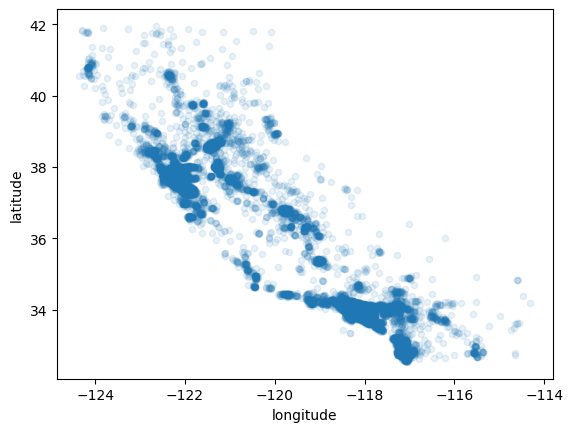

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


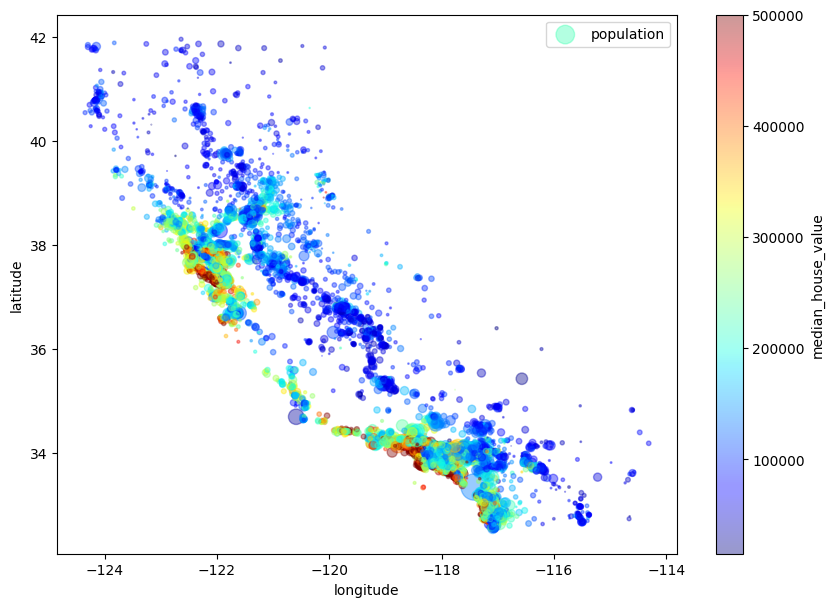

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as you probably knew already.
A clustering algorithm should be useful for detecting the main cluster and for adding
new features that measure the proximity to the cluster centers.

In [ ]:
#Computing the Pearson correlation coefficient
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.926306,-0.112277,0.053942,0.080040,0.109900,0.067425,-0.016611,-0.044802
latitude,-0.926306,1.000000,0.013914,-0.044170,-0.076183,-0.117926,-0.081393,-0.077570,-0.144512
housing_median_age,-0.112277,0.013914,1.000000,-0.367219,-0.327593,-0.302844,-0.309460,-0.112649,0.109845
total_rooms,0.053942,-0.044170,-0.367219,1.000000,0.927694,0.860759,0.917108,0.192185,0.126292
total_bedrooms,0.080040,-0.076183,-0.327593,0.927694,1.000000,0.883148,0.979935,-0.015644,0.041573
population,0.109900,-0.117926,-0.302844,0.860759,0.883148,1.000000,0.912834,-0.003404,-0.030684
households,0.067425,-0.081393,-0.309460,0.917108,0.979935,0.912834,1.000000,0.005404,0.057418
median_income,-0.016611,-0.077570,-0.112649,0.192185,-0.015644,-0.003404,0.005404,1.000000,0.690264
median_house_value,-0.044802,-0.144512,0.109845,0.126292,0.041573,-0.030684,0.057418,0.690264,1.000000


In [ ]:
#How much each value corresponds with the median house value column
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.690264
total_rooms,0.126292
housing_median_age,0.109845
households,0.057418
total_bedrooms,0.041573
population,-0.030684
longitude,-0.044802
latitude,-0.144512


Another way to check for correlation between attributes is to use the pandas **scatter_matrix()** function, which plots every numerical attribute against every other numerical attribute. This **scatter matrix** plots every **numerical attribute against every other numerical attribute**, plus a histogram of each numerical attribute

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

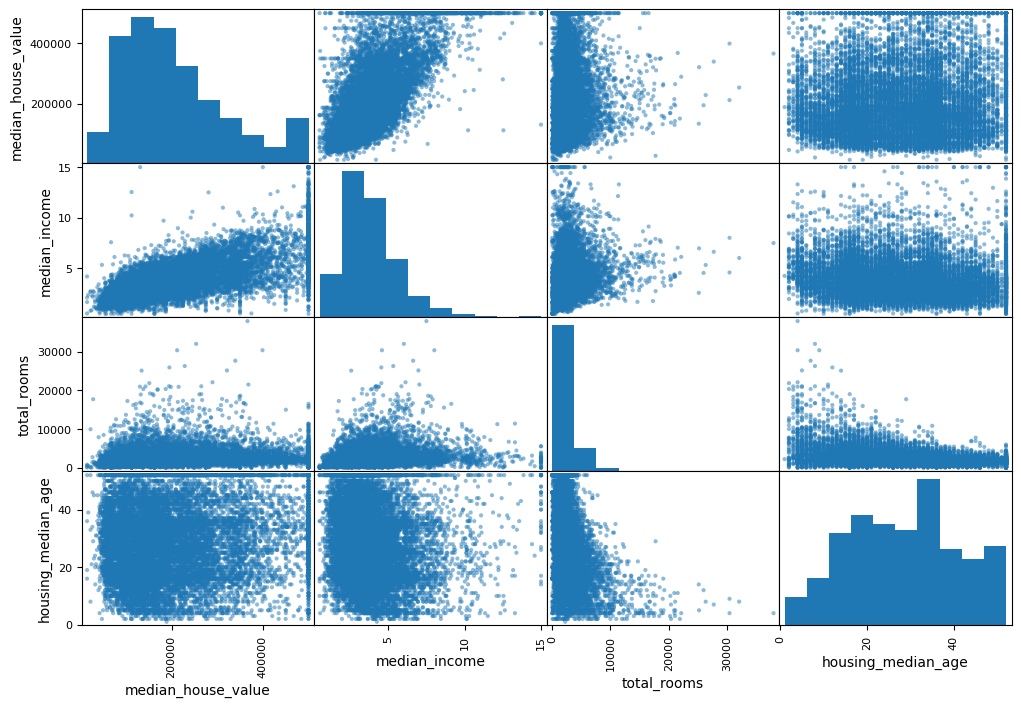

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

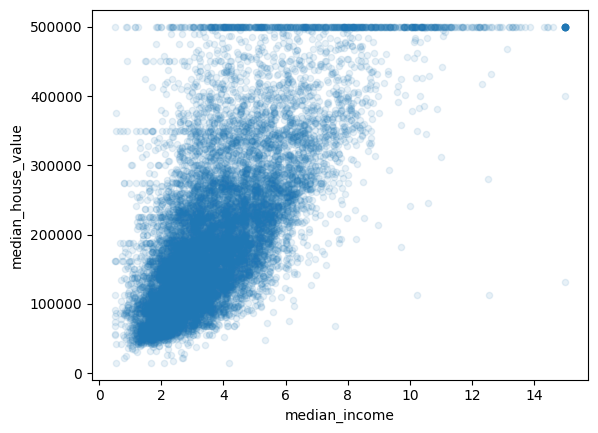

In [ ]:
#Plotting the Median income versus median house value
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

🔑- You identified a few data quirks that you may want to **clean up**
before feeding the data to a Machine Learning algorithm, and you found interesting **correlations between attributes**, in particular with the **target attribute**. You also noticed that some attributes have a **tail-heavy distribution**, so you may want to transform them (e.g., by **computing their logarithm**).

☔- One last thing you may want to do before preparing the data for Machine Learning algorithms is to try out **various attribute combinations**. For example, the total number of rooms in a district is **not very useful** if you don't know how many households there are. What you really want is the number of rooms per household. Similarly, the
total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at.

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.690264
rooms_per_household,0.143555
total_rooms,0.126292
housing_median_age,0.109845
households,0.057418
total_bedrooms,0.041573
population,-0.030684
longitude,-0.044802
latitude,-0.144512


The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.
This round of exploration does not have to be absolutely thorough; the point is to
start off on the right foot and quickly gain insights that will help you get a first rea‐
sonably good prototype. But this is an iterative process: once you get a prototype up
and running, you can analyze its output to gain more insights and come back to this
exploration step.

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them. We saw earlier that the total_bedrooms attribute has some missing values, so let's fix this. You have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).


You can accomplish these easily using DataFrame's **dropna()**, **drop()**, and **fillna()** methods:


In [ ]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

Scikit-Learn provides a handy class to take care of missing values: **SimpleImputer**. Here is how to use it. First, you need to create a **SimpleImputer instance**, specifying that you want to replace each attribute's missing values with the median of that attribute. (the median can only be computed on numerical attributes)

In [ ]:
from sklearn.impute import SimpleImputer
#Instace of the imputer
imputer = SimpleImputer(strategy="median")

#Now you can fit the imputer instance to the training data using the fit() method:
imputer.fit(housing)



The **imputer** has simply computed the median of each attribute and stored the result in its **statistics_** instance variable




In [ ]:
print(imputer.statistics_)
print(housing.median().values)

Now you can use this “trained” **imputer** to transform the training set by replacing missing values with the learned medians. The result is a plain **NumPy array** containing the **transformed features**.

In [ ]:
X = imputer.transform(housing)

#Converting the numpy array back into a pandas dataframe
housing_tr = pd.DataFrame(X, columns=housing.columns, index=housing.index)

In [ ]:
#Converting text data into numerical representations using the ordinal encoder
#NOTE: The ocean proximity category is not in this dataset so this step is not needed
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

In [ ]:
ordinal_encoder.categories_


## One Hot Encoding
Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After onehot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would
be very wasteful, so instead **a sparse matrix only stores the location of the nonzeroxelements**. You can use it mostly like a normal 2D array,21 but if you really want to convert it to a (dense) NumPy array, just call the **toarray()** method.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
print(housing_cat_1hot.toarray())
print(cat_encoder.categories_)

## Feature Scaling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

## Pipeline
The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like (as long as they are unique and don't contain double underscores, __); they will come in handy later for hyperparameter tuning.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])

❗ - So far, we have handled the **categorical columns** and the **numerical columns** separately. It would be more convenient to have a **single transformer able to handle all columns**, applying the appropriate **transformations** to each column. In version 0.20, Scikit-Learn introduced the **ColumnTransformer** for this purpose, and the good news is that it works great with **pandas DataFrames**.

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

First we import the **ColumnTransformer** class, next we get the list of **numerical column** names and the list of **categorical column** names, and then we construct a **ColumnTransformer**. The **constructor** requires a **list of tuples**, where each **tuple** contains a
name, a transformer, and a list of names (or indices) of columns that the **transformer** should be applied to. In this example, we specify that the **numerical columns** should be **transformed** using the num_pipeline that we defined earlier, and the **categorical columns** should be transformed using a **OneHotEncoder**. Finally, we apply this
**ColumnTransformer** to the housing data: it applies each **transformer** to the appropriate columns and concatenates the outputs along the second axis (the **transformers** must return the same number of rows).


Note that the **OneHotEncoder** returns a **sparse matrix**, while the **num_pipeline** returns a **dense matrix**. When there is such a mix of **sparse** and **dense matrices**, the **ColumnTransformer** estimates the density of the **final matrix** (i.e., the ratio of nonzero
cells **bold text**), and it returns a ** sparse matrix ** if the density is lower than a given threshold (by default, **sparse_threshold=0.3**). In this example, it returns a **dense matrix**.


And that's it! We have a **preprocessing pipeline** that takes the full housing data and applies the appropriate **transformations** to each column.

## The Model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

## Testing the model

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


## Measuring the Performance

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Since the model is **underfiiting** we will try to use a more powerful model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

## Evaluating the new model

The decison tree is overfitting the dataset, so i will use k-fold cross validation to get a more accurate performance metric.

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

A great alternative is to use **Scikit-Learn's K-fold cross-validation** feature. The following code **randomly splits the training set** into 10 **distinct subsets called folds**, then it trains and evaluates the **Decision Tree** model 10 times, picking a different **fold for evaluation every time** and training on the other 9 folds. The result is an array containing the 10 **evaluation scores**:

In [ ]:
def display_scores(scores):
 print("Scores:", scores)
 print("Mean:", scores.mean())
 print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


The **Decision Tree model** is **overfitting** so badly that it performs worse than the **Linear Regression model** .

## Random Forest
**Random Forests** work by training many **Decision Trees** on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called **Ensemble Learning**, and it is often a great way to push ML algorithms even further

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_rmse
display_scores(forest_rmse_scores)


## Grid Search
One option would be to fiddle with the **hyperparameters** manually, until you find a great combination of **hyperparameter values**. This would be very tedious work, and you may not have time to explore many combinations.

Instead, you should get **Scikit-Learn's GridSearchCV** to search for you. All you need to do is tell it which **hyperparameters** you want it to experiment with and what values to try out, and it will use **cross-validation** to evaluate all the possible **combinations of hyperparameter values** . For example, the following code searches for the best **combination of hyperparameter** values for the **RandomForestRegressor**:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

This **param_grid** tells **Scikit-Learn** to first evaluate all 3 * 4 = 12 combinations of **n_estimators** and **max_features hyperparameter** values specified in the first dict, then try all 2 * 3 = 6 combinations of **hyperparameter** values in the second dict, but this time with the **bootstrap hyperparameter** set to False instead of True (which is the default value for this hyperparameter).


The **grid search** will explore 12 + 6 = 18 combinations of **RandomForestRegressor hyperparameter values**, and it will train each model 5 times (since we are using **fivefold cross validation**). In other words, all in all, there will be 18 * 5 = 90 rounds of training! It may take quite a long time, but when it is done you can get the best combination of parameters like this.

In [ ]:
grid_search.best_params_

In [ ]:
#Gets the best estimator directly
grid_search.best_estimator_

🔑 - If **GridSearchCV** is initialized with **refit**=True (which is the
**default**), then once it finds the **best estimator** using **crossvalidation**, it retrains it on the **whole training set**. This is usually a good idea, since feeding it more data will likely improve its performance.


In [ ]:
#The evaluation scores are also available
cvres = grid_search.cv_results_
 for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
 print(np.sqrt(-mean_score), params)

Don't forget that you can treat some of the **data preparation steps** as
**hyperparameters**. For example, the **grid search** will automatically
find out whether or not to **add a feature** you were not sure about
(e.g., using the add_bedrooms_per_room hyperparameter of your
CombinedAttributesAdder transformer). It may similarly be used
to **automatically find the best way to handle outliers, missing features, feature selection**, and more.

You will often gain good insights on the problem by inspecting the best models.

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

With this information, you may want to try dropping some of the less useful features. You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem (adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.).